In [2]:
from match import * 

PrevTour = None
n = 8
counter = 1
with open("Data.txt","w") as f:
    f.write("Data = [ ")

In [ ]:
m = int(pow(2, n))
turnament = Tournament(n - 1) if PrevTour == None else PrevTour
print(turnament)
while True:
    for i in range(50):
        turnament.rank()
        GenData = [   
                    Match(turnament.ranking[i], turnament.ranking[i + 1]).getResult(
                        False
                    )
                    for i in range(0, len(turnament.ranking), 2)
                ]
        GenData = [(x,z) for x,y,z,w in GenData]
        GenData = [x for par in GenData for x in par]
        with open("Data.txt", "a") as f:
            f.write(str(GenData) + ", ")
        
        counter += 1
        

        print(counter)
        # print(
        #     Match(turnament.ranking[0], turnament.ranking[1]).getResult(
        #          False
        #     )
        # )
        PrevTour = turnament
        turnament = Tournament(
            reproduce(
                turnament.ranking,
                Keep=m // 2 + m // 32,
                Mixes=m // 16,
                Selections=m // 16,
                SingleMutations=m // 16,
                SlabMutations=m // 32,
                RainMutations=m // 16,
            )
        )

735
736
737
738


In [83]:
from os import system
system("copy Data.txt Data.py")
with open("Data.py", "a") as f:
            f.write("]")

In [84]:
import Data 
import importlib
importlib.reload(Data)
 
Max = [max([val for val in gen]) for gen in Data.Data]
Avg = [sum([val for val in gen])/len(gen) for gen in Data.Data]

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.3234e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


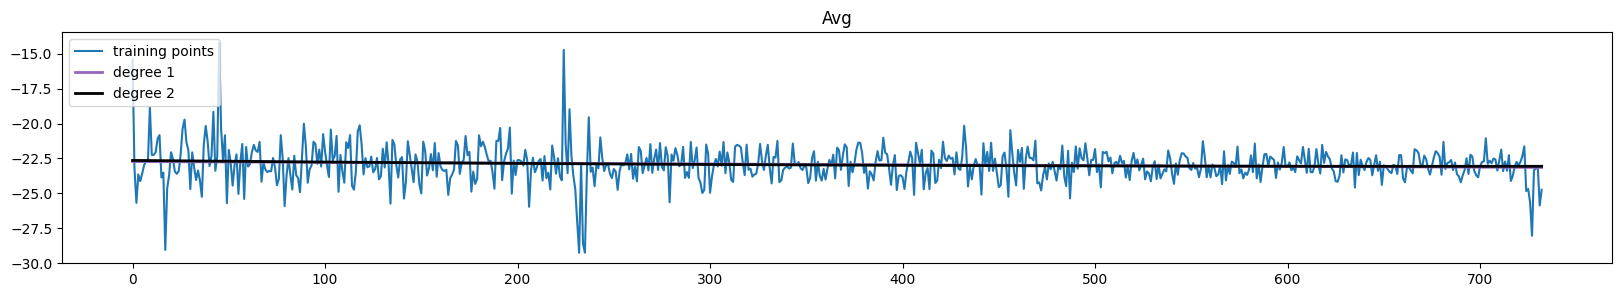

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.3234e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


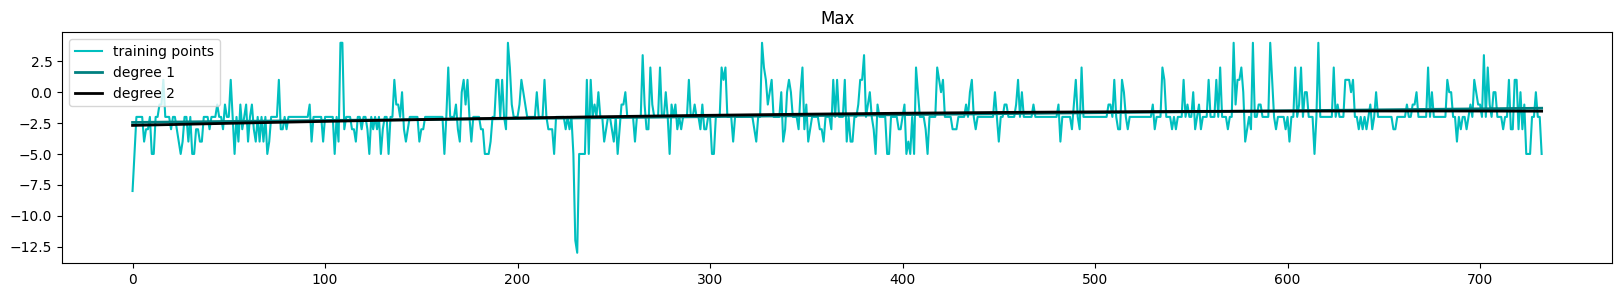

In [101]:
import Ploter as plt
importlib.reload(plt)
plt.plot(Avg,[1,2],{2: 'black', "plot":"tab:blue", 1:"tab:purple" },"Avg")
plt.plot(Max,[1,2],{2: 'black', "plot":"c" , 1: "teal" },"Max")
